In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [14]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
x = iris.data
y = iris.target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
dec_tree_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
dec_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [18]:
y_pred = dec_tree_model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
for i in range(len(y_test)):
    print('Actual:', y_test[i], '|', 'Predicted:', y_pred[i])

Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 2 | Predicted: 2
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 2 | Predicted: 2
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 2 | Predicted: 2
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 2 | Predicted: 2
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 2 | Predicted: 2
Actual: 0 | Predicted: 0
Actual: 2 | Predicted: 2
Actual: 0 | Predicted: 0
Actual: 2 | Predicted: 2
Actual: 2 | Predicted: 2
Actual: 2 | Predicted: 2
Actual: 2 | Predicted: 2
Actual: 2 | Predicted: 2
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 2 | Predicted: 2
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0


In [21]:
target = np.unique(y).astype('str')
feature_names = iris.feature_names

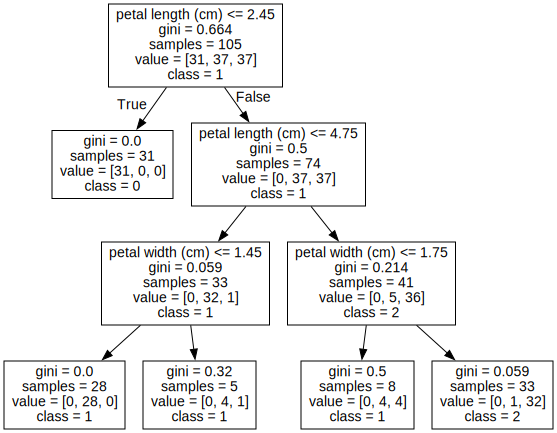

In [22]:
dot_data = export_graphviz(dec_tree_model, feature_names=feature_names, class_names=target)
graph = graphviz.Source(dot_data)
graph

In [23]:
importances = dec_tree_model.feature_importances_
importances

array([0.        , 0.        , 0.94889308, 0.05110692])

In [24]:
pd.DataFrame({'feature': feature_names,
              'importances': importances})

,feature,importances
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
2,petal length (cm),0.948893
3,petal width (cm),0.051107
